# ΤΕΧΝΙΚΕΣ ΕΞΟΡΥΞΗΣ ΔΕΔΟΜΕΝΩΝ   
#### Εαρινό Εξάμηνο 2021 - 2022
#### Απόστολος Θεοδώρου - 1115201500046

### Εργασία 2 - Υπολογισμός χρόνου ταξιδιού μέσω συσταδοποίησης

Σημείωση: Το παρόν notebook είναι τρεγμένο για 290000 ταξίδια. Η ανάλυση δεδομένων του διαφέρει σε σημεία σε σχέση με το πιο μικρό notebook. Το clustering έχει γίνει με λιγότερα σημεία και κάποια ερωτήματα στο κομμάτι της πρόβλεψης δεν μπορούν να τρέξουν σε εύλογο χρόνο. Στο παρόν notebook η ανάλυση δεδομένων αντικατοπρίζει καλύτερα το σύνολο των δεδομένων. Ωστόσο για να δείτε όλα τα ερωτήματα τρεγμένα και την πλήρη εργασία, δείτε το άλλο notebook (10000Samples_with_bonus_questions.ipynb)

### Ανάλυση Δεδομένων  

### 1)

Περιγραφή κώδικα στο παρακάτω κελί: 

-Διάβασμα των train δεδομένων και δημιουργία αντίστοιχου dataframe

-Εύρεση εύρους αοδεκτού χρόνου (διάστημα [mean-2std, mean+2std])

-Αφαίρεση των δεδομένων εκτός του εύρους αυτού

In [1]:
import pandas as pd

#Convert the csv file's data into a dataframe
data= pd.read_csv('train.csv')
data= data.head(290000)
df_train= pd.DataFrame(data)

#find the minimum and maximum accepted trip time 
description_df= df_train.describe()
mean_trip_duration= description_df.at['mean', 'trip_duration']
std_trip_duration= description_df.at['std', 'trip_duration']
max_accepted_trip_duration= mean_trip_duration + 2 * std_trip_duration
max_accepted_trip_duration= int (max_accepted_trip_duration)
min_accepted_trip_duration= mean_trip_duration - 2 * std_trip_duration
if min_accepted_trip_duration < 0:
    min_accepted_trip_duration= 0
print (f"Accepted trip time is: {min_accepted_trip_duration}-{max_accepted_trip_duration} sec")

#print(description_df)
#print(df_train)

#remove the outliers
for i in range (len(df_train)):
    if df_train.at[i, 'trip_duration'] < min_accepted_trip_duration or df_train.at[i, 'trip_duration'] > max_accepted_trip_duration:
        df_train= df_train.drop(i) 
df_train= df_train.reset_index()
#print(df_train)

Accepted trip time is: 0-15521 sec


### 2) 

Περιγραφή κώδικα στο παρακάτω κελί:

-Αφαίρεση των σημείων εκτός των ορίων της πόλης της Νέας Υόρκης (longitude[-74.03, -73.75], latitude[40.63, 40.85])

In [2]:
#print(df_train)
#focus on New York city
#remove points out of city's coordinates
for i in range (len(df_train)):
    if df_train.at[i, 'pickup_longitude'] < -74.03 or \
    df_train.at[i, 'pickup_longitude'] > -73.75 or \
    df_train.at[i, 'pickup_latitude'] < 40.63 or \
    df_train.at[i, 'pickup_latitude'] > 40.85 or \
    df_train.at[i, 'dropoff_longitude'] < -74.03 or \
    df_train.at[i, 'dropoff_longitude'] > -73.75 or \
    df_train.at[i, 'dropoff_latitude'] < 40.63 or \
    df_train.at[i, 'dropoff_latitude'] > 40.85:
        df_train= df_train.drop(i)
df_train= df_train.reset_index()
#print(df_train)

### 3) 

Περιγραφή κώδικα στο επόμενο κελί:

-Διάβασμα test δεδομένων και δημιουργία αντίστοιχου dataframe

-Μετατροπή τύπου στα features που περιέχουν ημερομηνία σε datetime

-Εξαγωγή νέων features day_period, day_name, month, hour, year, season

-Δημιουργία ιστογραμμάτων βασιζόμενων στα νέα features

Text(0, 0.5, 'Trips')

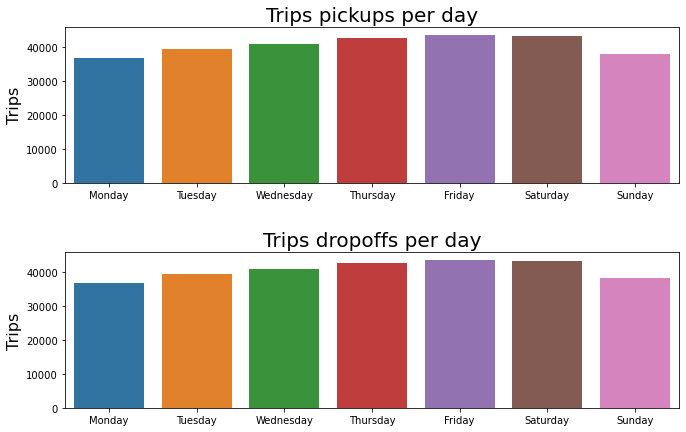

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt

#Convert the csv file's data into a dataframe
data= pd.read_csv('test.csv')
data= data.head(290000)
df_test= pd.DataFrame(data)

#convert the date and time format
df_train['pickup_datetime']= pd.to_datetime(df_train['pickup_datetime'])
df_train['dropoff_datetime']= pd.to_datetime(df_train['dropoff_datetime'])
df_test['pickup_datetime']= pd.to_datetime(df_test['pickup_datetime'])
#df_train.info()
#df_test.info()

#add the new columns to the dataframe
df_train['pickup_day_name']= "None"
df_test['pickup_day_name']= "None"
df_train['dropoff_day_name']= "None"
df_train['pickup_month']= "None"
df_test['pickup_month']= "None"
df_train['dropoff_month']= "None"
df_train['pickup_hour']= -1
df_test['pickup_hour']= -1
df_train['dropoff_hour']= -1
df_train['pickup_year']= -1
df_test['pickup_year']= -1
df_train['dropoff_year']= -1
df_train['pickup_season']= "None"
df_test['pickup_season']= "None"
df_train['dropoff_season']= "None"
df_train['pickup_day_period']= "None"
df_test['pickup_day_period']= "None"
df_train['dropoff_day_period']= "None"
#df_train.info()

#find day of the week
for i in range (len(df_train)):
    if df_train.at[i, 'pickup_datetime'].dayofweek == 0:
        df_train.at[i, 'pickup_day_name']= "Monday"
    elif df_train.at[i, 'pickup_datetime'].dayofweek == 1:
        df_train.at[i, 'pickup_day_name']= "Tuesday"
    elif df_train.at[i, 'pickup_datetime'].dayofweek == 2:
        df_train.at[i, 'pickup_day_name']= "Wednesday"
    elif df_train.at[i, 'pickup_datetime'].dayofweek == 3:
        df_train.at[i, 'pickup_day_name']= "Thursday"
    elif df_train.at[i, 'pickup_datetime'].dayofweek == 4:
        df_train.at[i, 'pickup_day_name']= "Friday"
    elif df_train.at[i, 'pickup_datetime'].dayofweek == 5:
        df_train.at[i, 'pickup_day_name']= "Saturday"
    elif df_train.at[i, 'pickup_datetime'].dayofweek == 6:
        df_train.at[i, 'pickup_day_name']= "Sunday"
    else: 
        df_train.at[i, 'pickup_day_name']= "Error"
        
for i in range (len(df_test)):
    if df_test.at[i, 'pickup_datetime'].dayofweek == 0:
        df_test.at[i, 'pickup_day_name']= "Monday"
    elif df_test.at[i, 'pickup_datetime'].dayofweek == 1:
        df_test.at[i, 'pickup_day_name']= "Tuesday"
    elif df_test.at[i, 'pickup_datetime'].dayofweek == 2:
        df_test.at[i, 'pickup_day_name']= "Wednesday"
    elif df_test.at[i, 'pickup_datetime'].dayofweek == 3:
        df_test.at[i, 'pickup_day_name']= "Thursday"
    elif df_test.at[i, 'pickup_datetime'].dayofweek == 4:
        df_test.at[i, 'pickup_day_name']= "Friday"
    elif df_test.at[i, 'pickup_datetime'].dayofweek == 5:
        df_test.at[i, 'pickup_day_name']= "Saturday"
    elif df_test.at[i, 'pickup_datetime'].dayofweek == 6:
        df_test.at[i, 'pickup_day_name']= "Sunday"
    else: 
        df_test.at[i, 'pickup_day_name']= "Error"
        
for i in range (len(df_train)):
    if df_train.at[i, 'dropoff_datetime'].dayofweek == 0:
        df_train.at[i, 'dropoff_day_name']= "Monday"
    elif df_train.at[i, 'dropoff_datetime'].dayofweek == 1:
        df_train.at[i, 'dropoff_day_name']= "Tuesday"
    elif df_train.at[i, 'dropoff_datetime'].dayofweek == 2:
        df_train.at[i, 'dropoff_day_name']= "Wednesday"
    elif df_train.at[i, 'dropoff_datetime'].dayofweek == 3:
        df_train.at[i, 'dropoff_day_name']= "Thursday"
    elif df_train.at[i, 'dropoff_datetime'].dayofweek == 4:
        df_train.at[i, 'dropoff_day_name']= "Friday"
    elif df_train.at[i, 'dropoff_datetime'].dayofweek == 5:
        df_train.at[i, 'dropoff_day_name']= "Saturday"
    elif df_train.at[i, 'dropoff_datetime'].dayofweek == 6:
        df_train.at[i, 'dropoff_day_name']= "Sunday"
    else: 
        df_train.at[i, 'dropoff_day_name']= "Error"

#find hour, month and year
for i in range (len(df_train)):
    df_train.at[i, 'pickup_hour']= df_train.at[i, 'pickup_datetime'].hour
    df_train.at[i, 'pickup_month']= df_train.at[i, 'pickup_datetime'].month
    df_train.at[i, 'pickup_year']= df_train.at[i, 'pickup_datetime'].year
    
for i in range (len(df_test)):
    df_test.at[i, 'pickup_hour']= df_test.at[i, 'pickup_datetime'].hour
    df_test.at[i, 'pickup_month']= df_test.at[i, 'pickup_datetime'].month
    df_test.at[i, 'pickup_year']= df_test.at[i, 'pickup_datetime'].year
    
for i in range (len(df_train)):
    df_train.at[i, 'dropoff_hour']= df_train.at[i, 'dropoff_datetime'].hour
    df_train.at[i, 'dropoff_month']= df_train.at[i, 'dropoff_datetime'].month
    df_train.at[i, 'dropoff_year']= df_train.at[i, 'dropoff_datetime'].year
        
#find season and day_period
for i in range (len(df_train)):
    if df_train.at[i, 'pickup_month'] == 1 or df_train.at[i, 'pickup_month'] == 2 or df_train.at[i, 'pickup_month'] == 12:
        df_train.at[i, 'pickup_season'] = "Winter"
    elif df_train.at[i, 'pickup_month'] == 3 or df_train.at[i, 'pickup_month'] == 4 or df_train.at[i, 'pickup_month'] == 5:
        df_train.at[i, 'pickup_season'] = "Spring"
    elif df_train.at[i, 'pickup_month'] == 6 or df_train.at[i, 'pickup_month'] == 7 or df_train.at[i, 'pickup_month'] == 8:
        df_train.at[i, 'pickup_season'] = "Summer"
    elif df_train.at[i, 'pickup_month'] == 9 or df_train.at[i, 'pickup_month'] == 10 or df_train.at[i, 'pickup_month'] == 11:
        df_train.at[i, 'pickup_season'] = "Autumn"
    else:
        df_train.at[i, 'pickup_season'] == "Error"
        
for i in range (len(df_test)):
    if df_test.at[i, 'pickup_month'] == 1 or df_test.at[i, 'pickup_month'] == 2 or df_test.at[i, 'pickup_month'] == 12:
        df_test.at[i, 'pickup_season'] = "Winter"
    elif df_test.at[i, 'pickup_month'] == 3 or df_test.at[i, 'pickup_month'] == 4 or df_test.at[i, 'pickup_month'] == 5:
        df_test.at[i, 'pickup_season'] = "Spring"
    elif df_test.at[i, 'pickup_month'] == 6 or df_test.at[i, 'pickup_month'] == 7 or df_test.at[i, 'pickup_month'] == 8:
        df_test.at[i, 'pickup_season'] = "Summer"
    elif df_test.at[i, 'pickup_month'] == 9 or df_test.at[i, 'pickup_month'] == 10 or df_test.at[i, 'pickup_month'] == 11:
        df_test.at[i, 'pickup_season'] = "Autumn"
    else:
        df_test.at[i, 'pickup_season'] == "Error"
        
for i in range (len(df_train)):
    if df_train.at[i, 'dropoff_month'] == 1 or df_train.at[i, 'dropoff_month'] == 2 or df_train.at[i, 'dropoff_month'] == 12:
        df_train.at[i, 'dropoff_season'] = "Winter"
    elif df_train.at[i, 'dropoff_month'] == 3 or df_train.at[i, 'dropoff_month'] == 4 or df_train.at[i, 'dropoff_month'] == 5:
        df_train.at[i, 'dropoff_season'] = "Spring"
    elif df_train.at[i, 'dropoff_month'] == 6 or df_train.at[i, 'dropoff_month'] == 7 or df_train.at[i, 'dropoff_month'] == 8:
        df_train.at[i, 'dropoff_season'] = "Summer"
    elif df_train.at[i, 'dropoff_month'] == 9 or df_train.at[i, 'dropoff_month'] == 10 or df_train.at[i, 'dropoff_month'] == 11:
        df_train.at[i, 'dropoff_season'] = "Autumn"
    else:
        df_train.at[i, 'dropoff_season'] == "Error"
        
for i in range (len(df_train)):
    if df_train.at[i, 'pickup_hour'] >= 6 and df_train.at[i, 'pickup_hour'] <= 11:
        df_train.at[i, 'pickup_day_period']= "Morning"
    elif df_train.at[i, 'pickup_hour'] >= 12 and df_train.at[i, 'pickup_hour'] <= 15:
        df_train.at[i, 'pickup_day_period']= "Afternoon"
    elif df_train.at[i, 'pickup_hour'] >= 16 and df_train.at[i, 'pickup_hour'] <= 21:
        df_train.at[i, 'pickup_day_period']= "Evening"
    elif df_train.at[i, 'pickup_hour'] >= 22 or df_train.at[i, 'pickup_hour'] <= 5:
        df_train.at[i, 'pickup_day_period']= "Late Night"
    else:
        df_train.at[i, 'pickup_day_period']= "Error"
        
for i in range (len(df_test)):
    if df_test.at[i, 'pickup_hour'] >= 6 and df_test.at[i, 'pickup_hour'] <= 11:
        df_test.at[i, 'pickup_day_period']= "Morning"
    elif df_test.at[i, 'pickup_hour'] >= 12 and df_test.at[i, 'pickup_hour'] <= 15:
        df_test.at[i, 'pickup_day_period']= "Afternoon"
    elif df_test.at[i, 'pickup_hour'] >= 16 and df_test.at[i, 'pickup_hour'] <= 21:
        df_test.at[i, 'pickup_day_period']= "Evening"
    elif df_test.at[i, 'pickup_hour'] >= 22 or df_test.at[i, 'pickup_hour'] <= 5:
        df_test.at[i, 'pickup_day_period']= "Late Night"
    else:
        df_test.at[i, 'pickup_day_period']= "Error"
        
for i in range (len(df_train)):
    if df_train.at[i, 'dropoff_hour'] >= 6 and df_train.at[i, 'dropoff_hour'] <= 11:
        df_train.at[i, 'dropoff_day_period']= "Morning"
    elif df_train.at[i, 'dropoff_hour'] >= 12 and df_train.at[i, 'dropoff_hour'] <= 15:
        df_train.at[i, 'dropoff_day_period']= "Afternoon"
    elif df_train.at[i, 'dropoff_hour'] >= 16 and df_train.at[i, 'dropoff_hour'] <= 21:
        df_train.at[i, 'dropoff_day_period']= "Evening"
    elif df_train.at[i, 'dropoff_hour'] >= 22 or df_train.at[i, 'dropoff_hour'] <= 5:
        df_train.at[i, 'dropoff_day_period']= "Late Night"
    else:
        df_train.at[i, 'dropoff_day_period']= "Error"
        
#print(df_train)

#Histograms
fig, axes = plt.subplots(2, 1, figsize=(11,7))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.45)

#busiest pickup days
mon= tue= wed= thu= fri= sat= sun= 0
for i in range (len(df_train)):
    if df_train.at[i, 'pickup_day_name'] == "Monday":
        mon+= 1
    elif df_train.at[i, 'pickup_day_name'] == "Tuesday":
        tue+= 1
    elif df_train.at[i, 'pickup_day_name'] == "Wednesday":
        wed+= 1
    elif df_train.at[i, 'pickup_day_name'] == "Thursday":
        thu+= 1
    elif df_train.at[i, 'pickup_day_name'] == "Friday":
        fri+= 1
    elif df_train.at[i, 'pickup_day_name'] == "Saturday":
        sat+= 1
    elif df_train.at[i, 'pickup_day_name'] == "Sunday":
        sun+= 1
        
days= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']        
l= [mon, tue, wed, thu, fri, sat, sun]
df_busiest_pickup_days= pd.DataFrame()
df_busiest_pickup_days['count']= l
df_busiest_pickup_days['day']= days
#print(df_busiest_pickup_days)

sns.barplot(data= df_busiest_pickup_days, x='day', y='count', ax=axes[0])
axes[0].set_title("Trips pickups per day", fontsize=20)
axes[0].set_xlabel(None)
axes[0].set_ylabel("Trips", fontsize=16)

#busiest dropoff days
mon= tue= wed= thu= fri= sat= sun= 0
for i in range (len(df_train)):
    if df_train.at[i, 'dropoff_day_name'] == "Monday":
        mon+= 1
    elif df_train.at[i, 'dropoff_day_name'] == "Tuesday":
        tue+= 1
    elif df_train.at[i, 'dropoff_day_name'] == "Wednesday":
        wed+= 1
    elif df_train.at[i, 'dropoff_day_name'] == "Thursday":
        thu+= 1
    elif df_train.at[i, 'dropoff_day_name'] == "Friday":
        fri+= 1
    elif df_train.at[i, 'dropoff_day_name'] == "Saturday":
        sat+= 1
    elif df_train.at[i, 'dropoff_day_name'] == "Sunday":
        sun+= 1
             
l= [mon, tue, wed, thu, fri, sat, sun]
df_busiest_dropoff_days= pd.DataFrame()
df_busiest_dropoff_days['count']= l
df_busiest_dropoff_days['day']= days
#print(df_busiest_dropoff_days)


sns.barplot(data= df_busiest_dropoff_days, x='day', y='count', ax=axes[1])
axes[1].set_title("Trips dropoffs per day", fontsize=20)
axes[1].set_xlabel(None)
axes[1].set_ylabel("Trips", fontsize=16)


Όπως ήταν αναμενόμενο τα ιστογράμματα των πιο πολυσύχναστων pickup και dropoff days ταυτίζονται, αφού συνήθως όση κίνηση και να έχει ο δρόμος, το ταξί θα φτάσει στον προορισμό του την ίδια μέρα με αυτήν που ξεκίνησε.

Text(0, 0.5, 'Trips')

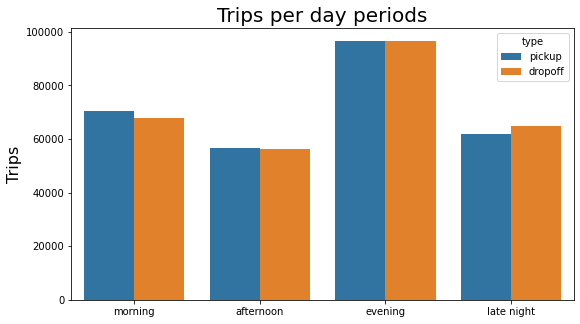

In [4]:
#Histograms


#busiest pickup and dropoff periods
mor= aft= eve= nig= 0
for i in range (len(df_train)):
    if df_train.at[i, 'pickup_day_period'] == "Morning":
        mor+= 1
    elif df_train.at[i, 'pickup_day_period'] == "Afternoon":
        aft+= 1
    elif df_train.at[i, 'pickup_day_period'] == "Evening":
        eve+= 1
    elif df_train.at[i, 'pickup_day_period'] == "Late Night":
        nig+= 1
        
periods= ['morning', 'afternoon', 'evening', 'late night']        
l= [mor, aft, eve, nig]
df1_busiest_day_period= pd.DataFrame()
df1_busiest_day_period['trips']= l
df1_busiest_day_period['period']= periods
df1_busiest_day_period['type']= 'pickup'
#print(df_busiest_pickup_day_period)

mor= aft= eve= nig= 0
for i in range (len(df_train)):
    if df_train.at[i, 'dropoff_day_period'] == "Morning":
        mor+= 1
    elif df_train.at[i, 'dropoff_day_period'] == "Afternoon":
        aft+= 1
    elif df_train.at[i, 'dropoff_day_period'] == "Evening":
        eve+= 1
    elif df_train.at[i, 'dropoff_day_period'] == "Late Night":
        nig+= 1
        
l= [mor, aft, eve, nig]
df2_busiest_day_period= pd.DataFrame()
df2_busiest_day_period['trips']= l
df2_busiest_day_period['period']= periods
df2_busiest_day_period['type']= 'dropoff'

df1_busiest_day_period= df1_busiest_day_period.append(df2_busiest_day_period)

plt.figure(figsize=(9,5))
ax = sns.barplot(x="period", y="trips", hue="type", data=df1_busiest_day_period)
ax.set_title("Trips per day periods", fontsize=20)
ax.set_xlabel(None)
ax.set_ylabel("Trips", fontsize=16)

Παρατηρούμε ότι οι περισσότερες μετακινήσεις λαμβάνουν χώρα το evening. Το afternoon πραγματοποιούνται τα λιγότερα ταξίδια. Αυτό λογικά οφείλεται στο γεγονός ότι οι περισσότεροι άνθρωποι αυτήν την ώρα εργάζονται, αρα δεν είναι στον δρόμο. Στον μειωμένο αριθμό ταξιδιών το afternοon ενδέχεται να συμβάλει επίσης η μειωμένη, σε σχέση με τις υπόλοιπες περιόδους της ημέρας, χρονική του διάρκεια (διαρκεί 4 ώρες, ενώ τα υπόλοιπα διαρκούν 6-8 ώρες). Τέλος γίνεται εμφανές ότι το morning και το afternoon οι αφίξεις(dropoffs) είναι ελαφρώς λιγότερες από τις αναχωρήσεις(pickups). Επομένως η κίνηση γύρω στις 12:00 και γύρω στις 16:00 ενδέχεται να είναι κάπως αυξημένη.   

Text(0, 0.5, 'Trips')

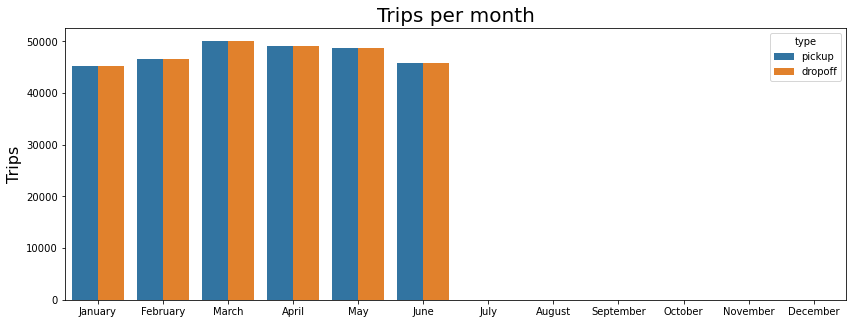

In [5]:
#Histograms


#busiest pickup and dropoff periods
jan= feb= mar= apr= may= jun= jul= aug= sep= octo= nov= dec= 0 
for i in range (len(df_train)):
    if df_train.at[i, 'pickup_month'] == 1:
        jan+= 1
    elif df_train.at[i, 'pickup_month'] == 2:
        feb+= 1
    elif df_train.at[i, 'pickup_month'] == 3:
        mar+= 1
    elif df_train.at[i, 'pickup_month'] == 4:
        apr+= 1
    elif df_train.at[i, 'pickup_month'] == 5:
        may+= 1
    elif df_train.at[i, 'pickup_month'] == 6:
        jun+= 1
    elif df_train.at[i, 'pickup_month'] == 7:
        jul+= 1
    elif df_train.at[i, 'pickup_month'] == 8:
        aug+= 1
    elif df_train.at[i, 'pickup_month'] == 9:
        sep+= 1
    elif df_train.at[i, 'pickup_month'] == 10:
        octo+= 1
    elif df_train.at[i, 'pickup_month'] == 11:
        nov+= 1
    elif df_train.at[i, 'pickup_month'] == 12:
        dec+= 1
  
months= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']        
l= [jan,feb,mar,apr,may,jun,jul,aug,sep,octo,nov,dec]
df1_busiest_month= pd.DataFrame()
df1_busiest_month['trips']= l
df1_busiest_month['month']= months
df1_busiest_month['type']= 'pickup'

jan= feb= mar= apr= may= jun= jul= aug= sep= octo= nov= dec= 0 
for i in range (len(df_train)):
    if df_train.at[i, 'dropoff_month'] == 1:
        jan+= 1
    elif df_train.at[i, 'dropoff_month'] == 2:
        feb+= 1
    elif df_train.at[i, 'dropoff_month'] == 3:
        mar+= 1
    elif df_train.at[i, 'dropoff_month'] == 4:
        apr+= 1
    elif df_train.at[i, 'dropoff_month'] == 5:
        may+= 1
    elif df_train.at[i, 'dropoff_month'] == 6:
        jun+= 1
    elif df_train.at[i, 'dropoff_month'] == 7:
        jul+= 1
    elif df_train.at[i, 'dropoff_month'] == 8:
        aug+= 1
    elif df_train.at[i, 'dropoff_month'] == 9:
        sep+= 1
    elif df_train.at[i, 'dropoff_month'] == 10:
        octo+= 1
    elif df_train.at[i, 'dropoff_month'] == 11:
        nov+= 1
    elif df_train.at[i, 'dropoff_month'] == 12:
        dec+= 1
          
l= [jan,feb,mar,apr,may,jun,jul,aug,sep,octo,nov,dec]
df2_busiest_month= pd.DataFrame()
df2_busiest_month['trips']= l
df2_busiest_month['month']= months
df2_busiest_month['type']= 'dropoff'

df1_busiest_month= df1_busiest_month.append(df2_busiest_month)

plt.figure(figsize=(14,5))
ax = sns.barplot(x="month", y="trips", hue="type", data=df1_busiest_month)
ax.set_title("Trips per month", fontsize=20)
ax.set_xlabel(None)
ax.set_ylabel("Trips", fontsize=16)



Για το πρώτο εξάμηνο του έτους, για το οποίο έχουμε δεδομένα, δεν παρατηρείται κάποια εξόφθαλμη διαφορά στο αριθμό των ταξιδιών. Μόνο μια μικρή μείωση τον Ιανουάριο που ίσως σχετίζεται με τις διακοπές των Χριστουγέννων.


Text(0, 0.5, 'Time in seconds')

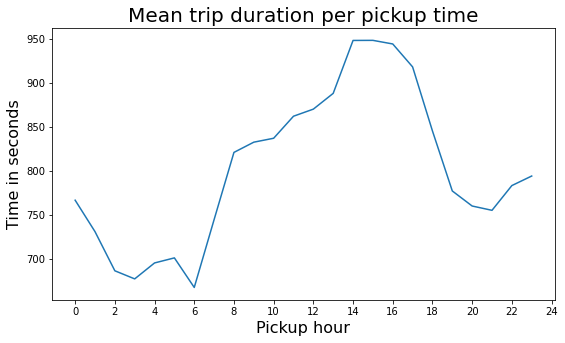

In [6]:
import matplotlib.ticker as ticker

duration_by_pickup_hour= [0] * 24
count= [0] * 24
for i in range(len(df_train)):
    for h in range (0, 24):
        if df_train.at[i, 'pickup_hour'] == h:
            duration_by_pickup_hour[h]+= df_train.at[i, 'trip_duration']
            count[h]+= 1

mean_duration_by_pickup_hour= [0.0] * 24
for i in range (0, 24):
    mean_duration_by_pickup_hour[i]= duration_by_pickup_hour[i] / count[i] 

line= pd.DataFrame()
line['mean_duration']= mean_duration_by_pickup_hour
line['pickup_hour']= list(range(0,24))

plt.figure(figsize=(9,5))
ax= sns.lineplot(data= line, x='pickup_hour', y='mean_duration')
ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.set_title("Mean trip duration per pickup time", fontsize=20)
ax.set_xlabel("Pickup hour",fontsize=16)
ax.set_ylabel("Time in seconds", fontsize=16)

Σε προηγούμενο διάγραμμα παρατηρήθηκε ότι το πλήθος των ταξιδιών κατά τις μεσημβρινές ώρες είναι μειωμένο. Εντούτοις, η μέση διάρκεια ταξιδιού τις ώρες αυτές είναι η υψηλότερη που καταγράφεται. Οι ενδείξεις μας για τη συγκεκριμένη χρονική περίοδο της ημέρας είναι αντικρουόμενες. Μία λογική εξήγηση θα ήταν ότι το μεσημέρι επικρατεί κίνηση στους δρόμους της Νέας Υόρκης η οποία όμως προκαλείται κυρίως από τους ιδιώτες οδηγούς και όχι τα ταξί. Eπιπρόσθετα, παρατηρείται μια ολοένα και αυξανόμενη μέση διάρκεια ταξιδιού κατά το δίωρο 6:00-8:00, γεγονός που καταμαρτυρά ότι μάλλον όσο πιο νωρίς ξεκινήσει κάποιος για τη δουλειά του το πρωί, τόσο πιο γρήγορα αναμένεται να φτάσει. Τέλος, μία αναμενόμενη παρατήρηση, τις μεταμεσονύκτιες ώρες η μέση διάρκεια ταξιδιού είναι σχεδόν κατά περίπου 33% μειωμένη σχέση με τις ώρες αιχμής.

Text(0, 0.5, 'Time in seconds')

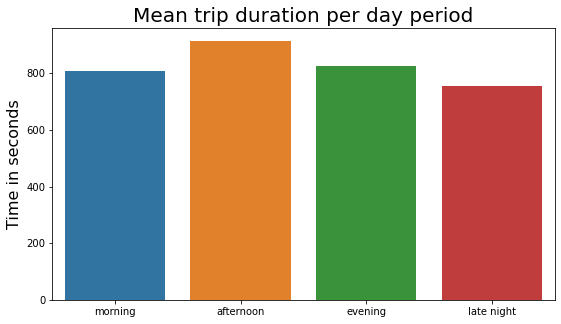

In [7]:
#Histograms

#mean trip duration per day period
mor_dur= aft_dur= eve_dur= nig_dur= 0
mor_count= aft_count= eve_count= nig_count= 0
for i in range (len(df_train)):
    if df_train.at[i, 'pickup_day_period'] == "Morning":
        mor_count+= 1
        mor_dur+= df_train.at[i, 'trip_duration']
    elif df_train.at[i, 'pickup_day_period'] == "Afternoon":
        aft_count+= 1
        aft_dur+= df_train.at[i, 'trip_duration']
    elif df_train.at[i, 'pickup_day_period'] == "Evening":
        eve_count+= 1
        eve_dur+= df_train.at[i, 'trip_duration']
    elif df_train.at[i, 'pickup_day_period'] == "Late Night":
        nig_count+= 1
        nig_dur+= df_train.at[i, 'trip_duration']
        
periods= ['morning', 'afternoon', 'evening', 'late night']        
mean_duration= [mor_dur/mor_count, aft_dur/aft_count, eve_dur/eve_count, nig_dur/nig_count]
df_mean_trip_duration_by_day_period= pd.DataFrame()
df_mean_trip_duration_by_day_period['mean_duration']= mean_duration
df_mean_trip_duration_by_day_period['period']= periods

plt.figure(figsize=(9,5))
ax = sns.barplot(x="period", y="mean_duration", data=df_mean_trip_duration_by_day_period)
ax.set_title("Mean trip duration per day period", fontsize=20)
ax.set_xlabel(None)
ax.set_ylabel("Time in seconds", fontsize=16)

Άλλο ένα διάγραμμα που παρατηρείται το παράδοξο, ενώ το afternoon να αριθμεί τα λιγότερα ταξίδια, ταυτόχρονα να έχει την μεγαλύτερη μέση διάρκεια ταξιδιού.

Text(0, 0.5, 'Time in seconds')

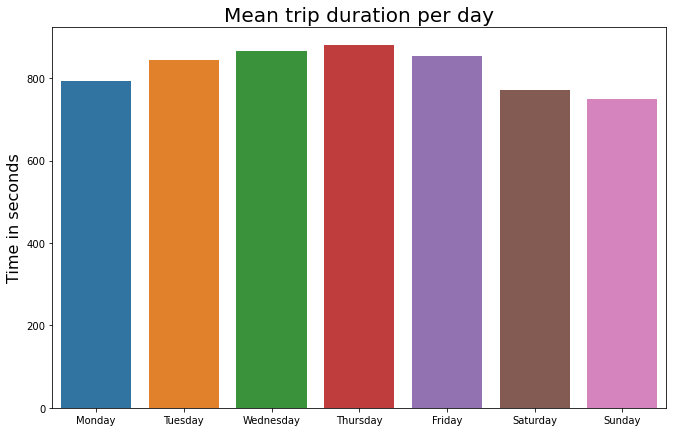

In [8]:
#mean trip duration per day of the week
mon_dur= tue_dur= wed_dur= thu_dur= fri_dur= sat_dur= sun_dur= 0
mon_count= tue_count= wed_count= thu_count= fri_count= sat_count= sun_count= 0

for i in range (len(df_train)):
    if df_train.at[i, 'pickup_day_name'] == "Monday":
        mon_count+= 1
        mon_dur+= df_train.at[i, 'trip_duration']
    elif df_train.at[i, 'pickup_day_name'] == "Tuesday":
        tue_count+= 1
        tue_dur+= df_train.at[i, 'trip_duration']
    elif df_train.at[i, 'pickup_day_name'] == "Wednesday":
        wed_count+= 1
        wed_dur+= df_train.at[i, 'trip_duration']
    elif df_train.at[i, 'pickup_day_name'] == "Thursday":
        thu_count+= 1
        thu_dur+= df_train.at[i, 'trip_duration']
    elif df_train.at[i, 'pickup_day_name'] == "Friday":
        fri_count+= 1
        fri_dur+= df_train.at[i, 'trip_duration']
    elif df_train.at[i, 'pickup_day_name'] == "Saturday":
        sat_count+= 1
        sat_dur+= df_train.at[i, 'trip_duration']
    elif df_train.at[i, 'pickup_day_name'] == "Sunday":
        sun_count+= 1
        sun_dur+= df_train.at[i, 'trip_duration']
        
days= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']        
mean_duration= [mon_dur/mon_count, tue_dur/tue_count, wed_dur/wed_count, thu_dur/thu_count, fri_dur/fri_count, sat_dur/sat_count, sun_dur/sun_count]
df_mean_trip_duration_per_day= pd.DataFrame()
df_mean_trip_duration_per_day['mean_duration']= mean_duration
df_mean_trip_duration_per_day['day']= days

plt.figure(figsize=(11,7))
ax= sns.barplot(data= df_mean_trip_duration_per_day, x='day', y='mean_duration')
ax.set_title("Mean trip duration per day", fontsize=20)
ax.set_xlabel(None)
ax.set_ylabel("Time in seconds", fontsize=16)

Ένα ενδιαφέρον στοιχείο που παρατηρείται σε αυτό το διάγραμμα είναι ότι το Σάββατο, παρόλο που αποτελεί την πιο πολυσύχναστη μέρα (όσον αφορά τον αριθμό των ταξιδιών), ο μέσος χρόνος ταξιδιού είναι (λίγο) χαμηλότερος από άλλες μέρες με λιγότερο αριθμό ταξιδιών. Αυτό μπορεί να οφείλεται στους λόγους ή τις ώρες των μετακινήσεων την ημέρα αυτή.

### 4) 

Περιγραφή του κώδικα στα 2 επόμενα κελιά:

-Δημιουργία ιστογράμματος για την κατανομή των ταξιδιών ως προς τη διάρκειά τους

-Δημιουργία αντίστοιχου διαγράμματος για τον λογάριθμο της διάρκειας

Text(0, 0.5, 'Trips')

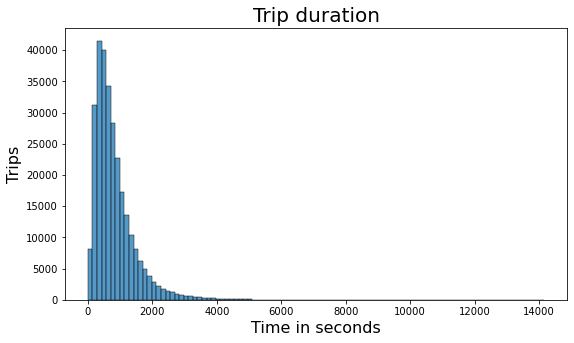

In [9]:
plt.figure(figsize=(9,5))
ax= sns.histplot(data= df_train, x='trip_duration', bins= 100)
ax.set_title("Trip duration", fontsize=20)
ax.set_xlabel("Time in seconds", fontsize=16)
ax.set_ylabel("Trips", fontsize=16)

Text(0, 0.5, 'Trips')

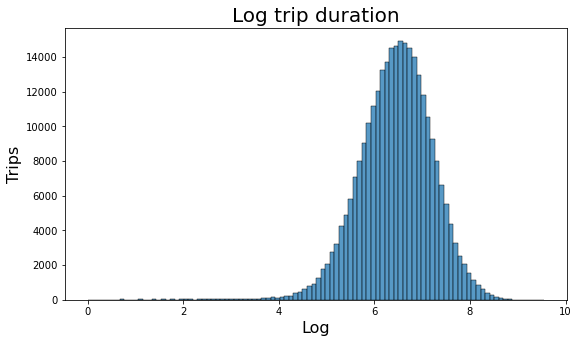

In [10]:
import numpy as np

df_train['log_trip_duration']= np.log(df_train['trip_duration'])

plt.figure(figsize=(9,5))
ax= sns.histplot(data= df_train, x='log_trip_duration', bins= 100)
ax.set_title("Log trip duration", fontsize=20)
ax.set_xlabel("Log", fontsize=16)
ax.set_ylabel("Trips", fontsize=16)

### 5)


Περιγραφή κώδικα για τα 2 επόμενα κελιά:

-Υπολογισμός μέσης διάρκειας ταξιδιού για τους δύο παρόχους

-Δημιουργία διαγράμματος ρολογιού για παρουσίαση των αποτελεσμάτων

In [11]:
company_A_dur= company_B_dur= 0
company_A_count= company_B_count= 0

for i in range (len(df_train)):
    if df_train.at[i, 'vendor_id'] == 1:
        company_A_count+=1
        company_A_dur+= df_train.at[i, 'trip_duration']
    elif df_train.at[i, 'vendor_id'] == 2:
        company_B_count+=1
        company_B_dur+= df_train.at[i, 'trip_duration']

mean_A= company_A_dur/company_A_count
mean_B= company_B_dur/company_B_count

mean_A_in_mins= mean_A/60
mean_B_in_mins= mean_B/60
print(mean_A_in_mins, mean_B_in_mins)

13.617176692963918 13.8239095027564


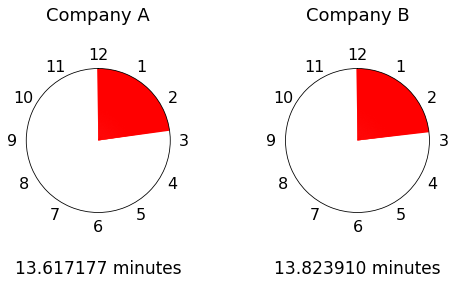

In [12]:
from numpy import pi

plt.subplots_adjust(left=1.5,
                    bottom=2.0, 
                    right=2.5, 
                    top=2.5, 
                    wspace=0.5, 
                    hspace=0.5)

ax = plt.subplot(121, polar=True)
ax.set_title("Company A\n", fontsize=18)


# suppress the radial labels
plt.setp(ax.get_yticklabels(), visible=False)

# set the circumference labels
ax.set_xticks(np.linspace(0, 2*pi, 12, endpoint=False))
ax.set_xticklabels([12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], fontsize=16)


# make the labels go clockwise
ax.set_theta_direction(-1)

# place 12 at the top    
ax.set_theta_offset(pi/2.0)
plt.grid(None)

# put the points on the circumference
plt.ylim(0,1)

#0.1044 angle corresponds to 1 minute
for i in np.arange(0, mean_A_in_mins, 0.1):
    ax.bar(i*0.1044, 1, width=0.03, bottom=0.0, color='r', linewidth=0.0)
ax.set_xlabel('\n%f minutes' %mean_A_in_mins, fontsize=17)



ax = plt.subplot(122, polar=True)
ax.set_title("Company B\n", fontsize=18)

# suppress the radial labels
plt.setp(ax.get_yticklabels(), visible=False)

# set the circumference labels
ax.set_xticks(np.linspace(0, 2*pi, 12, endpoint=False))
ax.set_xticklabels([12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], fontsize=16)


# make the labels go clockwise
ax.set_theta_direction(-1)

# place 12 at the top    
ax.set_theta_offset(pi/2.0)
plt.grid(None)

# put the points on the circumference
plt.ylim(0,1)

#0.1044 angle corresponds to 1 minute
for i in np.arange(0, mean_B_in_mins, 0.1):
    ax.bar(i*0.1044, 1, width=0.03, bottom=0.0, color='r', linewidth=0.0)
ax.set_xlabel('\n%f minutes' %mean_B_in_mins, fontsize=17)
plt.show()

Ο πάροχος της υπηρεσίας μεταφοράς φαίνεται να μην παίζει ουσιαστικό ρόλο στην διάρκεια του ταξιδιού

### 6) 

Περιγραφή κώδικα επόμενου κελιού:

-Δημιουργία 4 ομάδων επιβατών (ένας, 2-3, 4-6, 7+) και εύρεση μέσου χρόνου ταξιδιού ανά ομάδα

Text(0, 0.5, 'Time in seconds')

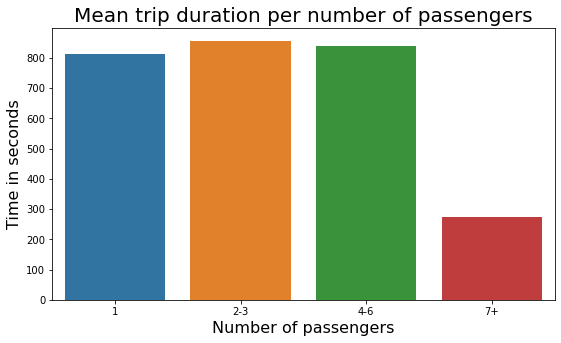

In [13]:
one= two_to_three= four_to_six= seven_or_more= 0
one_dur= two_to_three_dur= four_to_six_dur= seven_or_more_dur= 0
mean_one= mean_two_to_three= mean_four_to_six= mean_seven_or_more= 0

for i in range(len(df_train)):
    if df_train.at[i, 'passenger_count'] == 1:
        one+= 1
        one_dur+= df_train.at[i, 'trip_duration']
    elif df_train.at[i, 'passenger_count'] == 2 or df_train.at[i, 'passenger_count'] == 3:
        two_to_three+= 1
        two_to_three_dur+= df_train.at[i, 'trip_duration']
    elif df_train.at[i, 'passenger_count'] >= 4 and df_train.at[i, 'passenger_count'] <= 6:
        four_to_six+= 1
        four_to_six_dur+= df_train.at[i, 'trip_duration']
    else:
        seven_or_more+=1
        seven_or_more_dur+= df_train.at[i, 'trip_duration']

if one > 0:
    mean_one= one_dur/one
if two_to_three > 0:
    mean_two_to_three= two_to_three_dur/two_to_three
if four_to_six > 0:
    mean_four_to_six= four_to_six_dur/four_to_six
if seven_or_more > 0 :
    mean_seven_or_more= seven_or_more_dur/seven_or_more

l= [mean_one, mean_two_to_three, mean_four_to_six, mean_seven_or_more]
groups= ['1', '2-3', '4-6', '7+']
df_duration_passengers= pd.DataFrame()
df_duration_passengers['mean_duration']= l
df_duration_passengers['groups']= groups

plt.figure(figsize=(9,5))
ax= sns.barplot(data= df_duration_passengers, x='groups', y='mean_duration')
ax.set_title("Mean trip duration per number of passengers", fontsize=20)
ax.set_xlabel("Number of passengers", fontsize=16)
ax.set_ylabel("Time in seconds", fontsize=16)

### 7) 

Περιγραφή κώδικα στο παρακάτω κελί:

-Υπολογισμός της απόστασης Manhattan αλλά και της πραγματικής απόστασης (σε ευθεία) μεταξύ του σημείου έναρξης και τερματισμού ενός ταξιδιού

-Εύρεσης μέσης απόστασης ταξιδιού ανά ημέρα

-Παρουσίαση σχέσης απόστασης με διάρκεια ταξιδιού

Text(0, 0.5, 'Distance in km')

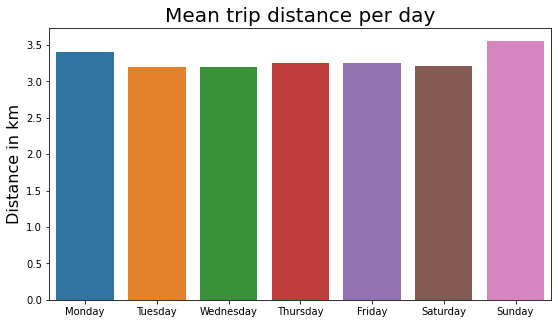

In [14]:
!pip install geopy
from sklearn.metrics.pairwise import manhattan_distances
from geopy.distance import geodesic as GD

df_train['manhattan_distance']= 0.0
df_test['manhattan_distance']= 0.0
df_train['km_distance']= 0.0
df_test['km_distance']= 0.0


for i in range (len(df_train)):
    pickup= (df_train.at[i, 'pickup_latitude'], df_train.at[i, 'pickup_longitude'])
    dropoff= (df_train.at[i, 'dropoff_latitude'], df_train.at[i, 'dropoff_longitude'])
    df_train.at[i, 'manhattan_distance']= manhattan_distances([pickup], [dropoff], sum_over_features=True)[0][0]
    df_train.at[i, 'km_distance']= GD(pickup, dropoff).km
    
for i in range (len(df_test)):
    pickup= (df_test.at[i, 'pickup_latitude'], df_test.at[i, 'pickup_longitude'])
    dropoff= (df_test.at[i, 'dropoff_latitude'], df_test.at[i, 'dropoff_longitude'])
    df_test.at[i, 'manhattan_distance']= manhattan_distances([pickup], [dropoff], sum_over_features=True)[0][0]
    df_test.at[i, 'km_distance']= GD(pickup, dropoff).km


mon_dist= tue_dist= wed_dist= thu_dist= fri_dist= sat_dist= sun_dist= 0.0
mon_count= tue_count= wed_count= thu_count= fri_count= sat_count= sun_count= 0
mon_mean= tue_mean= wed_mean= thu_mean= fri_mean= sat_mean= sun_mean= 0.0

for i in range(len(df_train)):
    if df_train.at[i, 'pickup_day_name'] == "Monday":
        mon_count+= 1
        mon_dist+= df_train.at[i, 'km_distance']
    elif df_train.at[i, 'pickup_day_name'] == "Tuesday":
        tue_count+= 1
        tue_dist+= df_train.at[i, 'km_distance']
    elif df_train.at[i, 'pickup_day_name'] == "Wednesday":
        wed_count+= 1
        wed_dist+= df_train.at[i, 'km_distance']
    elif df_train.at[i, 'pickup_day_name'] == "Thursday":
        thu_count+= 1
        thu_dist+= df_train.at[i, 'km_distance']
    elif df_train.at[i, 'pickup_day_name'] == "Friday":
        fri_count+= 1
        fri_dist+= df_train.at[i, 'km_distance']
    elif df_train.at[i, 'pickup_day_name'] == "Saturday":
        sat_count+= 1
        sat_dist+= df_train.at[i, 'km_distance']
    elif df_train.at[i, 'pickup_day_name'] == "Sunday":
        sun_count+= 1
        sun_dist+= df_train.at[i, 'km_distance']

mon_mean= mon_dist/mon_count
tue_mean= tue_dist/tue_count
wed_mean= wed_dist/wed_count
thu_mean= thu_dist/thu_count
fri_mean= fri_dist/fri_count
sat_mean= sat_dist/sat_count
sun_mean= sun_dist/sun_count

df_mean_dist_per_day= pd.DataFrame()
df_mean_dist_per_day['mean_dist']= [mon_mean, tue_mean, wed_mean, thu_mean, fri_mean, sat_mean, sun_mean]
df_mean_dist_per_day['day']= days

plt.figure(figsize=(9,5))
ax= sns.barplot(data= df_mean_dist_per_day, x='day', y='mean_dist')
ax.set_title("Mean trip distance per day", fontsize=20)
ax.set_xlabel(None)
ax.set_ylabel("Distance in km", fontsize=16)



Η μέση απόσταση κυμαίνεται μεταξύ 3 και 4 χιλιομέτρων και δεν φαίνεται να επηρεάζεται ιδιαίτερα από την ημέρα

Text(0, 0.5, 'Time in seconds')

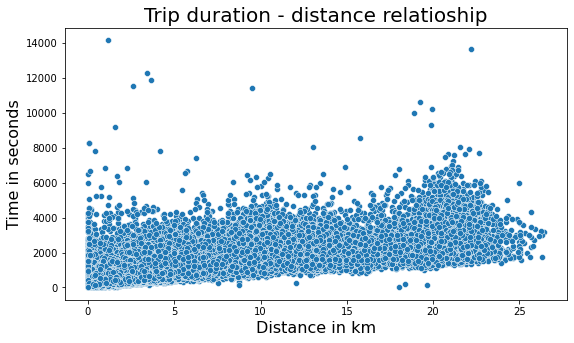

In [15]:
plt.figure(figsize=(9,5))
ax= sns.scatterplot(data= df_train, x= 'km_distance', y='trip_duration')
ax.set_title("Trip duration - distance relatioship", fontsize=20)
ax.set_xlabel("Distance in km", fontsize=16)
ax.set_ylabel("Time in seconds", fontsize=16)


Η απόσταση με τη διάρκεια του ταξιδιού φαίνεται να έχουν μια γραμμική σχέση

### 8)


Περιγραφή κώδικα στο παρακάτω κελί:

-Εύρεση μέσης ταχύτητας ταξιδιού για κάθε ταξίδι(χρησιμοποιώντας την μετρικής της απόστασης σε ευθεία, διότι είναι πιο κοντα στην πραγματική απόσταση σε σχέση με την Manhattan)

-Εύρεση και παρουσίαση της μέσας ταχύτητας ταξιδιού ανά ημέρα, μήνα και περίοδο της ημέρας

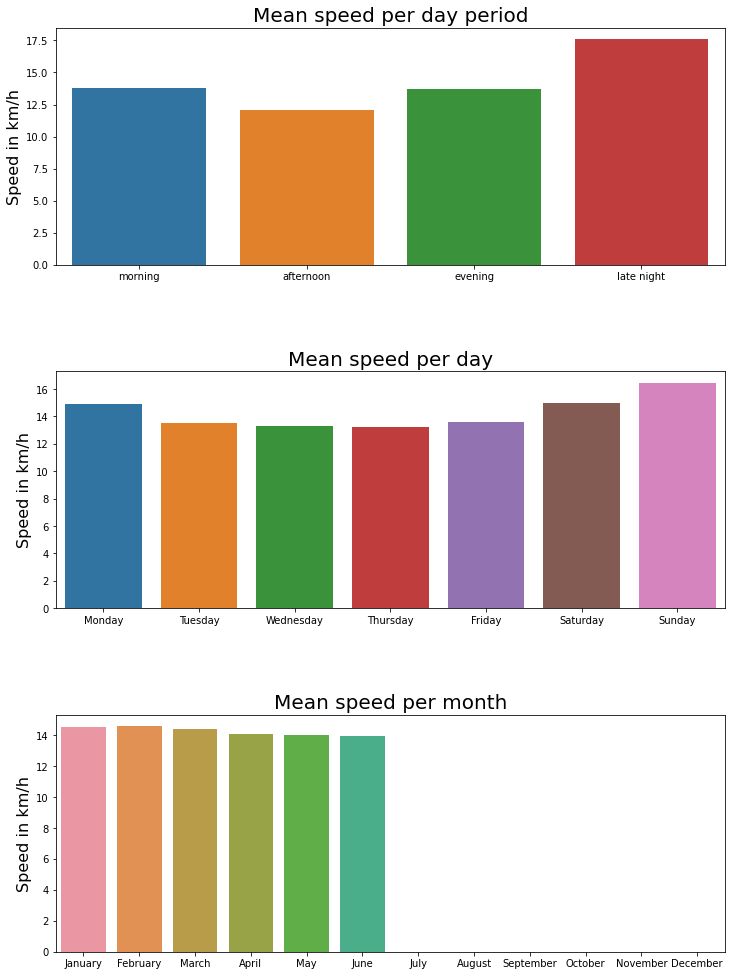

In [16]:
df_train['mean_speed']= 0.0
for i in range (len(df_train)):
    df_train.at[i,'mean_speed']= df_train.at[i, 'km_distance']/ (df_train.at[i, 'trip_duration']/3600)


#mean speed per day period
mor_spe= aft_spe= eve_spe= nig_spe= 0
mor_count= aft_count= eve_count= nig_count= 0
for i in range (len(df_train)):
    if df_train.at[i, 'pickup_day_period'] == "Morning":
        mor_count+= 1
        mor_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_day_period'] == "Afternoon":
        aft_count+= 1
        aft_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_day_period'] == "Evening":
        eve_count+= 1
        eve_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_day_period'] == "Late Night":
        nig_count+= 1
        nig_spe+= df_train.at[i, 'mean_speed']
        
periods= ['morning', 'afternoon', 'evening', 'late night']        
mean_speed= [mor_spe/mor_count, aft_spe/aft_count, eve_spe/eve_count, nig_spe/nig_count]
df_mean_speed_by_day_period= pd.DataFrame()
df_mean_speed_by_day_period['mean_speed']= mean_speed
df_mean_speed_by_day_period['period']= periods

fig, axes = plt.subplots(3, 1, figsize=(12,17))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.45)


sns.barplot(x="period", y="mean_speed", data=df_mean_speed_by_day_period, ax= axes[0])
axes[0].set_title("Mean speed per day period", fontsize=20)
axes[0].set_xlabel(None)
axes[0].set_ylabel("Speed in km/h", fontsize=16)


#mean speed per day of the week
mon_spe= tue_spe= wed_spe= thu_spe= fri_spe= sat_spe= sun_spe= 0
mon_count= tue_count= wed_count= thu_count= fri_count= sat_count= sun_count= 0

for i in range (len(df_train)):
    if df_train.at[i, 'pickup_day_name'] == "Monday":
        mon_count+= 1
        mon_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_day_name'] == "Tuesday":
        tue_count+= 1
        tue_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_day_name'] == "Wednesday":
        wed_count+= 1
        wed_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_day_name'] == "Thursday":
        thu_count+= 1
        thu_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_day_name'] == "Friday":
        fri_count+= 1
        fri_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_day_name'] == "Saturday":
        sat_count+= 1
        sat_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_day_name'] == "Sunday":
        sun_count+= 1
        sun_spe+= df_train.at[i, 'mean_speed']
        
days= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']        
mean_speed= [mon_spe/mon_count, tue_spe/tue_count, wed_spe/wed_count, thu_spe/thu_count, fri_spe/fri_count, sat_spe/sat_count, sun_spe/sun_count]
df_mean_speed_per_day= pd.DataFrame()
df_mean_speed_per_day['mean_speed']= mean_speed
df_mean_speed_per_day['day']= days

sns.barplot(data= df_mean_speed_per_day, x='day', y='mean_speed', ax= axes[1])
axes[1].set_title("Mean speed per day", fontsize=20)
axes[1].set_xlabel(None)
axes[1].set_ylabel("Speed in km/h", fontsize=16)


#Mean speed per month
jan_spe= feb_spe= mar_spe= apr_spe= may_spe= jun_spe= jul_spe= aug_spe= sep_spe= octo_spe= nov_spe= dec_spe= 0
jan_count= feb_count= mar_count= apr_count= may_count= jun_count= jul_count= aug_count= sep_count= octo_count= nov_count= dec_count= 0
for i in range (len(df_train)):
    if df_train.at[i, 'pickup_month'] == 1:
        jan_count+= 1
        jan_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_month'] == 2:
        feb_count+= 1
        feb_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_month'] == 3:
        mar_count+= 1
        mar_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_month'] == 4:
        apr_count+= 1
        apr_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_month'] == 5:
        may_count+= 1
        may_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_month'] == 6:
        jun_count+= 1
        jun_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_month'] == 7:
        jul_count+= 1
        jul_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_month'] == 8:
        aug_count+= 1
        aug_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_month'] == 9:
        sep_count+= 1
        sep_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_month'] == 10:
        octo_count+= 1
        octo_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_month'] == 11:
        nov_count+= 1
        nov_spe+= df_train.at[i, 'mean_speed']
    elif df_train.at[i, 'pickup_month'] == 12:
        dec_count+= 1
        dec_spe+= df_train.at[i, 'mean_speed']
  
months= ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']        

if jan_count != 0:
    jan_mean= jan_spe/jan_count
else: 
    jan_mean=0.0
if feb_count != 0:
    feb_mean= feb_spe/feb_count
else: 
    feb_mean=0.0
if mar_count != 0:
    mar_mean= mar_spe/mar_count
else: 
    mar_mean=0.0
if apr_count != 0:
    apr_mean= apr_spe/apr_count
else: 
    apr_mean=0.0
if may_count != 0:
    may_mean= may_spe/may_count
else: 
    may_mean=0.0
if jun_count != 0:
    jun_mean= jun_spe/jun_count
else: 
    jun_mean=0.0
if jul_count != 0:
    jul_mean= jul_spe/jul_count
else: 
    jul_mean=0.0
if aug_count != 0:
    aug_mean= aug_spe/aug_count
else: 
    aug_mean=0.0
if sep_count != 0:
    sep_mean= sep_spe/sep_count
else: 
    sep_mean=0.0
if octo_count != 0:
    octo_mean= octo_spe/octo_count
else: 
    octo_mean=0.0
if nov_count != 0:
    nov_mean= nov_spe/nov_count
else: 
    nov_mean=0.0
if dec_count != 0:
    dec_mean= dec_spe/dec_count
else: 
    dec_mean=0.0

mean_speed= [jan_mean, feb_mean, mar_mean, apr_mean, may_mean, jun_mean, jul_mean, aug_mean, sep_mean, octo_mean, nov_mean, dec_mean]
df_mean_speed_per_month= pd.DataFrame()
df_mean_speed_per_month['mean_speed']= mean_speed
df_mean_speed_per_month['month']= months

sns.barplot(x="month", y="mean_speed", data=df_mean_speed_per_month, ax= axes[2])
axes[2].set_title("Mean speed per month", fontsize=20)
axes[2].set_xlabel(None)
axes[2].set_ylabel("Speed in km/h", fontsize=16)

plt.show()

Διαπιστώνεται ότι η Κυριακή είναι η μέρα με την υψηλότερη μέση ταχύτητα. Δεν μας παραξενεύει, μιας και η Κυριακή είναι για πολλούς ημέρα ξεκούρασης και δεν υποχρεούνται να χρησιμοποιήσουν κάποιο όχημα για να πάνε στην εργασία τους. Επιπλέον η μέση ταχύτητα παρουσιάζεται αυξημένη τις νυχτερινές ώρες, όταν ο δρόμος αναμένεται να είναι σχετικά άδειος. Τέλος ο μήνας δεν δείχνει να επηρεάζει κάπως την μέση ταχύτητα 

### 9)


Περιγραφή κώδικα στο επόμενο κελί:

-Δημιουργία scatter plots για τα pickups και dropoffs σημεία

Text(0, 0.5, 'Latitude')

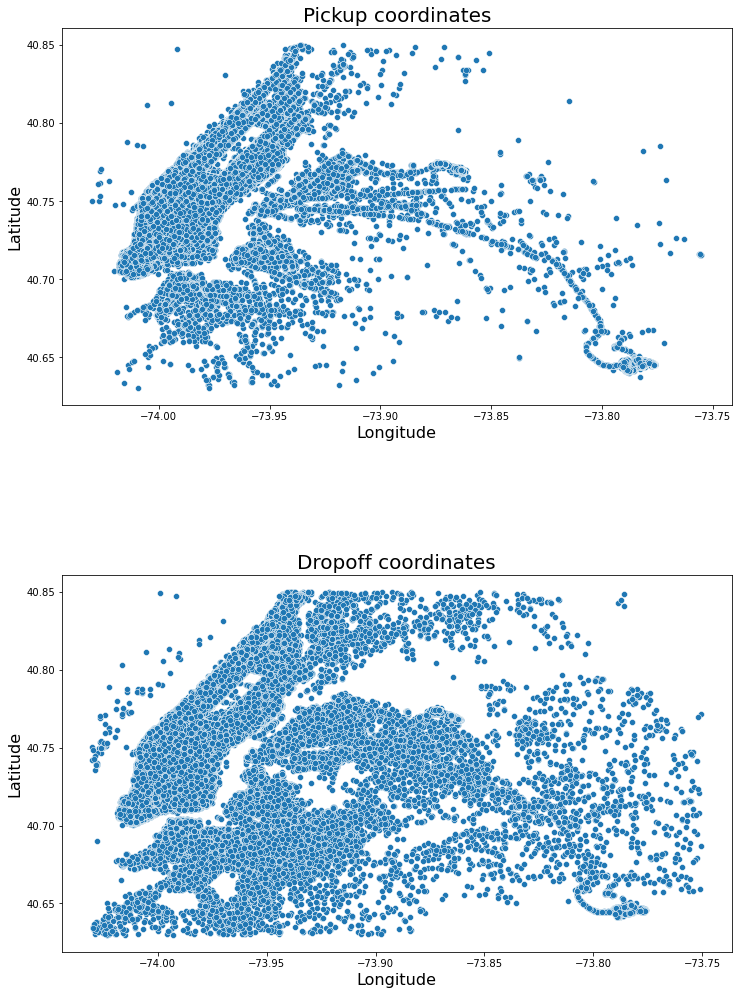

In [17]:
fig, axes = plt.subplots(2, 1, figsize=(12,17))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.45)


sns.scatterplot(data= df_train, x= 'pickup_longitude', y='pickup_latitude', ax= axes[0])
axes[0].set_title("Pickup coordinates", fontsize=20)
axes[0].set_xlabel("Longitude", fontsize=16)
axes[0].set_ylabel("Latitude", fontsize=16)

sns.scatterplot(data= df_train, x= 'dropoff_longitude', y='dropoff_latitude', ax= axes[1])
axes[1].set_title("Dropoff coordinates", fontsize=20)
axes[1].set_xlabel("Longitude", fontsize=16)
axes[1].set_ylabel("Latitude", fontsize=16)

Το scatter plot των pickups είναι πολύ πυκνότερο στην περιοχή του Manhattan και πιο αραιό στο Μπρούκλιν. Αντιθέτως το διάγραμμα των dropoffs είναι πυκνό και στις δύο περιοχές. Από αυτό το γεγονός διαφαίνεται ότι αυτοί που χρησιμοποιούν περισσότερο ταξί στη Νέα Υόρκη είναι μάλλον οι κάτικοι του Manhattan, οι οποίοι το χρησιμοποιούν είτε για κοντινές διαδρομές, εντός Manhattan, είτε για πιο μακρυνές.

Επίσης στο δεύτερο plot διακρίνονται περιοχές στις οποίες τα pickups είναι σχεδόν μηδενικά. Αυτές οι περιοχές βρίσκονται στα περίχωρα της Νέας Υόρκης, μακρυά από πυκνοκατοικημένες συνοικίες όπως το Brooklyn, το Manhattan, το Harlem και το Bronx. Μάλλον πρόκειται για περιοχές με λιγότερες κατοικίες και περισσότερους χώρους εργασίας. 

### Συσταδοποίηση και πρόβλεψη διάρκειας ταξιδιού

### 1)


Περιγραφή κώδικα στο επόμενο κελι:

-Δημιουργία πίνακα με τις συντεταγμένες κάθε pickup location

-Χωρισμός των pickup locations σε clusters με τον αλγόριθμο Kmeans



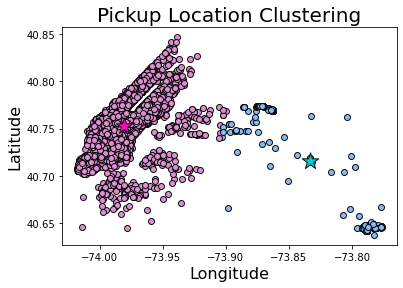

In [18]:
from sklearn.cluster import KMeans
import numpy as np

#create an array with each pickup points coordinates
X= np.zeros(shape=(len(df_train), 2))
for i in range (len(df_train)):
    X[i][0]= df_train.at[i, 'pickup_latitude']
    X[i][1]= df_train.at[i, 'pickup_longitude']

#separate the points into clusters
kmeans = KMeans(n_clusters=2).fit(X)

#make a dataframe with each point coordinates and cluster
df_kmeans= pd.DataFrame()
df_kmeans['latitude']= 0.0
df_kmeans['longitude']= 0.0
df_kmeans['cluster']= 0

#assign values to the elements of the dataframe
for i in range(0, 10000):
    df_kmeans.at[i, 'latitude']= X[i][0]
    df_kmeans.at[i, 'longitude']= X[i][1]
    df_kmeans.at[i, 'cluster']= kmeans.labels_[i]

#plot each point painted according to the cluster it belongs
for i in range (len(df_kmeans)):
    if df_kmeans.at[i, 'cluster'] == 0:
        plt.scatter(df_kmeans.at[i, 'longitude'], df_kmeans.at[i, 'latitude'], c="#db91d0", edgecolors='#0f0b0f')
    elif df_kmeans.at[i, 'cluster'] == 1:
        plt.scatter(df_kmeans.at[i, 'longitude'], df_kmeans.at[i, 'latitude'], c="#85bcf2", edgecolors='#0f0b0f')

#Insert the centers of the two clusters in the plot
plt.scatter(kmeans.cluster_centers_[0][1], kmeans.cluster_centers_[0][0], c="#fa0abe", edgecolors='#0f0b0f', marker="*", s= 300)
plt.scatter(kmeans.cluster_centers_[1][1], kmeans.cluster_centers_[1][0], c="#02ced1", edgecolors='#0f0b0f', marker="*", s= 300)

#make the plot
plt.title("Pickup Location Clustering", fontsize=20)
plt.xlabel("Longitude", fontsize=16)
plt.ylabel("Latitude", fontsize=16)

plt.show()

Οι τοποθεσίες έναρξης των ταξιδιών μπορούν να ομαδοποιηθούν αρκετά ευδιάκριτα σε 2 clusters. Το πρώτο (μπλε) αποτελείται από τα ταξίδια που πραγματοποιήθηκαν εντός της πόλης της Νέας Υόρκης (ως επί των πλείστων στην περιοχή του Μανχάτταν). Στο δεύτερο συγκαταλέγονται τα ταξίδια που είχαν σημείο έναρξης ένα από τα δύο αεροδρόμια της πόλης και τα μεταξύ αυτών σημεία (LaGuardia Airport στο κέντρο, John F. Kennedy International Airport κάτω δεξιά).

### 2)

Περιγραφή του κώδικα στο παρακάτω κελί:

-Δημιουργία δύο νέων dataframes, ένα με τα features που θα χρησιμοποιηθούν για την πρόβλεψη της διάρκειας ταξιδιου και ένα με τους πραγματικούς χρόνους

-Πρόβλεψη χρόνου ταξιδιού με Random Forest Regression

-Εύρεση του βάρους κάθε χαρακτηριστικού στην πρόβλεψη του χρόνου

-


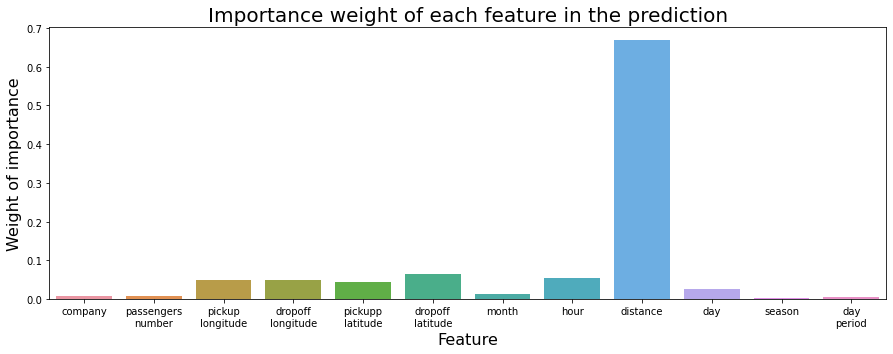

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

X_train= pd.DataFrame()
X_test= pd.DataFrame()
X_train['vendor_id']= df_train['vendor_id']  
X_test['vendor_id']= df_test['vendor_id']
X_train['passenger_count']= df_train['passenger_count']
X_test['passenger_count']= df_test['passenger_count']
X_train['pickup_longitude']= df_train['pickup_longitude']
X_test['pickup_longitude']= df_test['pickup_longitude']
X_train['dropoff_longitude']= df_train['dropoff_longitude']
X_test['dropoff_longitude']= df_test['dropoff_longitude']
X_train['pickup_latitude']= df_train['pickup_latitude']
X_test['pickup_latitude']= df_test['pickup_latitude']
X_train['dropoff_latitude']= df_train['dropoff_latitude']
X_test['dropoff_latitude']= df_test['dropoff_latitude']
X_train['pickup_month']= df_train['pickup_month']
X_test['pickup_month']= df_test['pickup_month']
X_train['pickup_hour']= df_train['pickup_hour']
X_test['pickup_hour']= df_test['pickup_hour']
X_train['km_distance']= df_train['km_distance']
X_test['km_distance']= df_test['km_distance']


#Convert day name, season, day period from string to integers
# 1->Monday, 2->Tuesday, ..., 7->Sunday
X_train['pickup_day']= 0  
X_test['pickup_day']= 0
# 1->Winter, 2->Spring, 3->Summer, 4->Autumn
X_train['pickup_season']= 0
X_test['pickup_season']= 0
# 1->Morning, 2->Afternoon, 3->Evening, 4->Late Night
X_train['pickup_day_period']= 0
X_test['pickup_day_period']= 0

for i in range(len(df_train)):
    if df_train.at[i, 'pickup_day_name'] == 'Monday':
        X_train.at[i, 'pickup_day']= 1
    elif df_train.at[i, 'pickup_day_name'] == 'Tuesday':
        X_train.at[i, 'pickup_day']= 2
    elif df_train.at[i, 'pickup_day_name'] == 'Wednesday':
        X_train.at[i, 'pickup_day']= 3
    elif df_train.at[i, 'pickup_day_name'] == 'Thurday':
        X_train.at[i, 'pickup_day']= 4
    elif df_train.at[i, 'pickup_day_name'] == 'Friday':
        X_train.at[i, 'pickup_day']= 5
    elif df_train.at[i, 'pickup_day_name'] == 'Saturday':
        X_train.at[i, 'pickup_day']= 6
    elif df_train.at[i, 'pickup_day_name'] == 'Sunday':
        X_train.at[i, 'pickup_day']= 7
        
for i in range(len(df_test)):
    if df_test.at[i, 'pickup_day_name'] == 'Monday':
        X_test.at[i, 'pickup_day']= 1
    elif df_test.at[i, 'pickup_day_name'] == 'Tuesday':
        X_test.at[i, 'pickup_day']= 2
    elif df_test.at[i, 'pickup_day_name'] == 'Wednesday':
        X_test.at[i, 'pickup_day']= 3
    elif df_test.at[i, 'pickup_day_name'] == 'Thurday':
        X_test.at[i, 'pickup_day']= 4
    elif df_test.at[i, 'pickup_day_name'] == 'Friday':
        X_test.at[i, 'pickup_day']= 5
    elif df_test.at[i, 'pickup_day_name'] == 'Saturday':
        X_test.at[i, 'pickup_day']= 6
    elif df_test.at[i, 'pickup_day_name'] == 'Sunday':
        X_test.at[i, 'pickup_day']= 7

for i in range(len(df_train)):
    if df_train.at[i, 'pickup_season'] == 'Winter':
        X_train.at[i, 'pickup_season']= 1
    elif df_train.at[i, 'pickup_season'] == 'Spring':
        X_train.at[i, 'pickup_season']= 2
    elif df_train.at[i, 'pickup_season'] == 'Summer':
        X_train.at[i, 'pickup_season']= 3
    elif df_train.at[i, 'pickup_season'] == 'Autumn':
        X_train.at[i, 'pickup_season']= 4
        
for i in range(len(df_test)):
    if df_test.at[i, 'pickup_season'] == 'Winter':
        X_test.at[i, 'pickup_season']= 1
    elif df_test.at[i, 'pickup_season'] == 'Spring':
        X_test.at[i, 'pickup_season']= 2
    elif df_test.at[i, 'pickup_season'] == 'Summer':
        X_test.at[i, 'pickup_season']= 3
    elif df_test.at[i, 'pickup_season'] == 'Autumn':
        X_test.at[i, 'pickup_season']= 4

for i in range(len(df_train)):
    if df_train.at[i, 'pickup_day_period'] == 'Morning':
        X_train.at[i, 'pickup_day_period']= 1
    elif df_train.at[i, 'pickup_day_period'] == 'Afternoon':
        X_train.at[i, 'pickup_day_period']= 2
    elif df_train.at[i, 'pickup_day_period'] == 'Evening':
        X_train.at[i, 'pickup_day_period']= 3
    elif df_train.at[i, 'pickup_day_period'] == 'Late Night':
        X_train.at[i, 'pickup_day_period']= 4
        
for i in range(len(df_test)):
    if df_test.at[i, 'pickup_day_period'] == 'Morning':
        X_test.at[i, 'pickup_day_period']= 1
    elif df_test.at[i, 'pickup_day_period'] == 'Afternoon':
        X_test.at[i, 'pickup_day_period']= 2
    elif df_test.at[i, 'pickup_day_period'] == 'Evening':
        X_test.at[i, 'pickup_day_period']= 3
    elif df_test.at[i, 'pickup_day_period'] == 'Late Night':
        X_test.at[i, 'pickup_day_period']= 4

y_log= df_train['log_trip_duration']
y= df_train['trip_duration']

regr = RandomForestRegressor()
regr.fit(X_train, y_log)
predictions_log= regr.predict(X_test)

importances = regr.feature_importances_

df_importances= pd.DataFrame()
df_importances['weight']= importances
df_importances['features']= ['company', 'passengers\nnumber', 'pickup\nlongitude', 'dropoff\nlongitude','pickupp\nlatitude', 'dropoff\nlatitude', 'month', 'hour', 'distance', 'day', 'season', 'day\nperiod']

plt.figure(figsize=(15,5))
ax= sns.barplot(x="features", y="weight", data=df_importances)
ax.set_title("Importance weight of each feature in the prediction", fontsize=20)
ax.set_xlabel("Feature", fontsize=16)
ax.set_ylabel("Weight of importance", fontsize=16)
print("-")


Όπως αναμφισβήτητα προκύπτει από το ιστόγραμμα, η σημασία της απόστασης που το ταξί καλείται να διανύσει έχει την πιο βαρύνουσα σημασία στην εκτίμηση του χρόνου του ταξιδιού. Ακολούθως κάποια χαρακτηριστικά που τείνουν να έχουν μια επίδραση στην πρόβλεψη είναι η ώρα και οι συντεταγμένες. Ενδεχομένως περιοχές του κέντρου με πιο πυκνή κυκλοφορία και ώρες αιχμής να προσδίδουν μια ελαφριά προσαύξηση στον προβλεπόμενο χρόνο άφιξης στον προορισμό. Τέλος, η εταιρία φαίνεται να είναι εντελώς αμελητέα μεταβλητή. Αυτό το συμπέρασμα επιβεβαιώνεται και από τους μέσους χρόνους εξυπηρέτησης κάθε εταιρίας, οι οποίοι, όπως φάνηκε σε προηγούμενο διάγραμμα, διέφεραν κατά λιγότερο από μισό λεπτό. 

### 3)


Περιγραφή κώδικα στο επόμενο κελί:

-Εύρεση βέλτιστων παραμέτρων του μοντέλου μέσω GridSearchCV

In [21]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[450,500], 'max_depth':[450,500], 'max_features':[1,12]}
regr = RandomForestRegressor()
GSCV_regr = GridSearchCV(regr, parameters)
GSCV_regr.fit(X_train, y_log)
print(GSCV_regr.best_params_)


KeyboardInterrupt: 

### 4)

Περιγραφή κώδικα στο επόμενο κελί:

-Επανεκπαίδευση του μοντέλου με τις βέλτιστες παραμέτρους του προηγούμενου ερωτήματος

In [ ]:
regr = RandomForestRegressor(max_depth=500, max_features=12, n_estimators= 500)
regr.fit(X_train, y_log)
predictions_log= regr.predict(X_test)


### 5)

Περιγραφή κώδικα του επόμενου ερωτήματος:

-Αξιολόγηση της πρόβλεψης με τις μετρικές mse, mae

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#Convert the csv file's data into a dataframe
data= pd.read_csv('target.csv')
data= data.head(290000)
df_target= pd.DataFrame(data)

df_target['log_trip_duration']= 0.0
for i in range(len(df_target)):
    df_target.at[i, 'log_trip_duration']= np.log(df_target.at[i, 'trip_duration'])

mae= mean_absolute_error(df_target['log_trip_duration'], predictions_log)
mse= mean_squared_error(df_target['log_trip_duration'], predictions_log)

print( mae, mse)